# Gráficos

In [2]:
#importo librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuraciones recomendadas para mejor visualización en notebooks
%matplotlib inline
#%matplotlib tk
plt.style.use('seaborn-v0_8-whitegrid') # Un estilo agradable para Matplotlib
sns.set_theme(style="whitegrid", palette="pastel") # Un tema agradable para Seaborn

## Gráfico de líneas

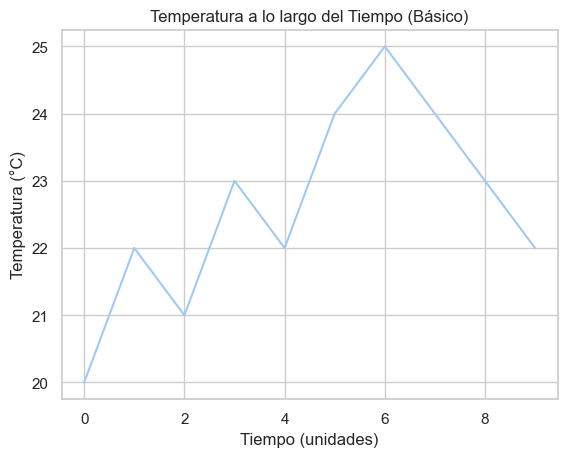

In [3]:
# --- Datos ---
# Supongamos una secuencia de mediciones a lo largo del tiempo
tiempo = np.arange(0, 10, 1) # Puntos de tiempo de 0 a 9
mediciones_temperatura = np.array([20, 22, 21, 23, 22, 24, 25, 24, 23, 22]) # Mediciones
 
# --- Creación del Gráfico ---
fig, ax = plt.subplots() # Crea una figura y un conjunto de ejes (subplot)
 
# Dibuja el gráfico de líneas
ax.plot(tiempo, mediciones_temperatura)
 
# --- Personalización Básica ---
ax.set_title('Temperatura a lo largo del Tiempo (Básico)') # Título del gráfico
ax.set_xlabel('Tiempo (unidades)') # Etiqueta del eje X
ax.set_ylabel('Temperatura (°C)') # Etiqueta del eje Y
 
plt.show() # Muestra el gráfico

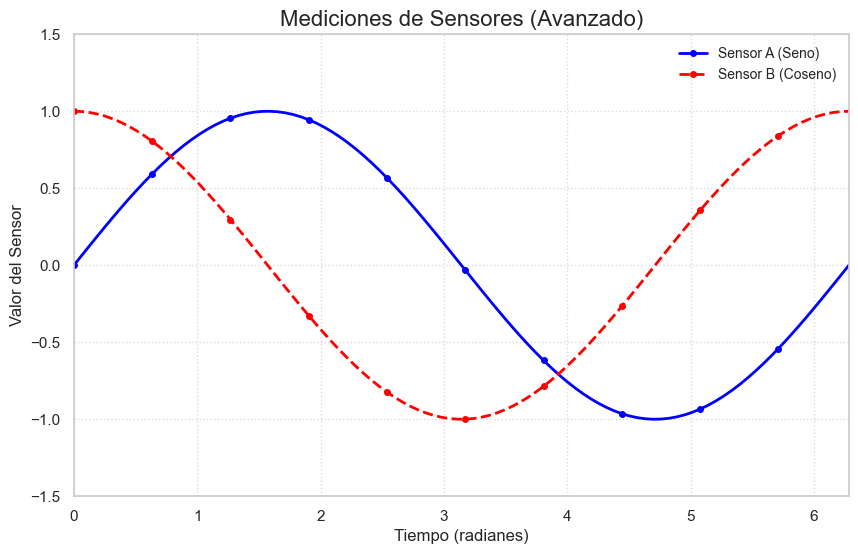

In [4]:
# --- Datos ---
# Múltiples series de datos (ej. mediciones de dos sensores)
tiempo_avanzado = np.linspace(0, 2 * np.pi, 100) # Puntos de tiempo más detallados
# Array 2D donde cada fila es una serie de mediciones
mediciones_sensores = np.array([
    np.sin(tiempo_avanzado),         # Sensor A (onda seno)
    np.cos(tiempo_avanzado)          # Sensor B (onda coseno)
])
nombres_sensores = ['Sensor A (Seno)', 'Sensor B (Coseno)']
colores_sensores = ['blue', 'red']
estilos_linea = ['-', '--']
 
# --- Creación del Gráfico ---
fig, ax = plt.subplots(figsize=(10, 6)) # Ajusta el tamaño de la figura
 
# Dibuja cada serie de mediciones con personalización
for i in range(mediciones_sensores.shape[0]): # Itera sobre cada fila (sensor)
    ax.plot(tiempo_avanzado, mediciones_sensores[i, :],
            label=nombres_sensores[i],      # Etiqueta para la leyenda
            color=colores_sensores[i],      # Color de la línea
            linestyle=estilos_linea[i],     # Estilo de la línea
            linewidth=2,                    # Grosor de la línea
            marker='o',                     # Marcador en cada punto
            markersize=4,                   # Tamaño del marcador
            markevery=10)                   # Muestra marcador cada 10 puntos
 
# --- Personalización Avanzada ---
ax.set_title('Mediciones de Sensores (Avanzado)', fontsize=16)
ax.set_xlabel('Tiempo (radianes)', fontsize=12)
ax.set_ylabel('Valor del Sensor', fontsize=12)
ax.legend(loc='upper right', fontsize=10) # Posición y tamaño de la leyenda
ax.grid(True, linestyle=':', alpha=0.7) # Añade una cuadrícula con estilo
ax.set_xlim(0, 2 * np.pi) # Define los límites del eje X
ax.set_ylim(-1.5, 1.5)    # Define los límites del eje Y
 
plt.show()

## Grafícos de líneas con Seaborn

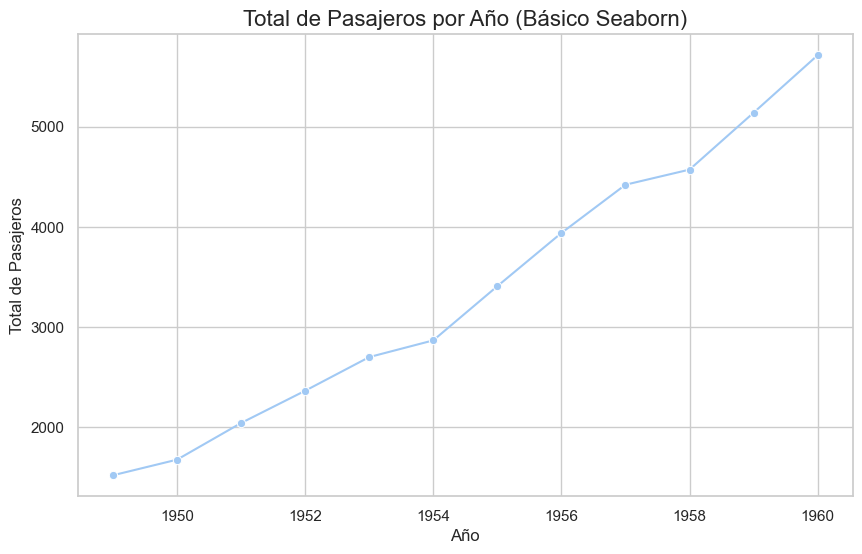

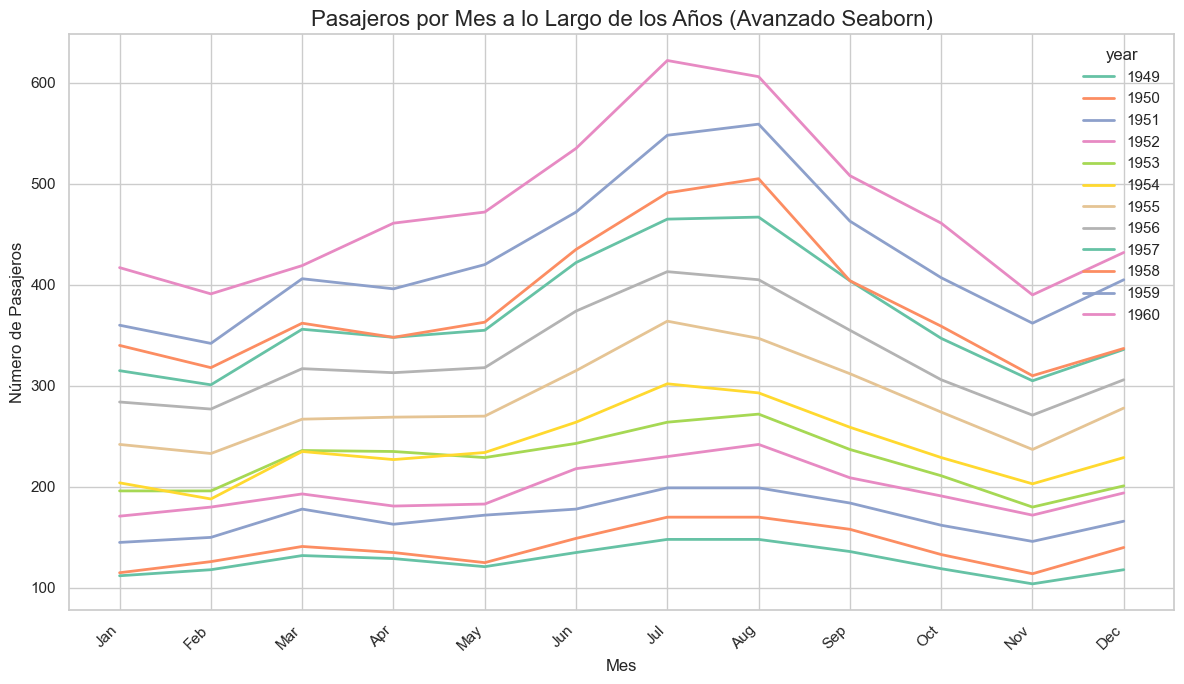

In [5]:
# --- Datos (usaremos el dataset 'flights' incorporado en Seaborn) ---
# Este dataset podría similar a uno que obtendrías de Kaggle sobre vuelos.
# Para usar un CSV de Kaggle, harías:
# df_vuelos = pd.read_csv('tu_archivo_de_vuelos.csv', parse_dates=['columna_fecha'])
df_vuelos = sns.load_dataset('flights')
# 'flights' tiene columnas: year, month, passengers
 
# --- Creación del Gráfico (Básico con una línea, ej. total de pasajeros por año) ---
# Primero, necesitamos agregar los pasajeros por año
pasajeros_por_año = df_vuelos.groupby('year')['passengers'].sum().reset_index()
 
fig, ax = plt.subplots(figsize=(10, 6)) # Ajusta el tamaño de la figura
sns.lineplot(data=pasajeros_por_año, x='year', y='passengers', ax=ax, marker='o') # Dibuja la línea con marcadores en cada punto
ax.set_title('Total de Pasajeros por Año (Básico Seaborn)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Total de Pasajeros', fontsize=12)
plt.show()
 
# --- Gráfico Avanzado (múltiples líneas usando 'hue') ---
# Visualizar pasajeros por mes, con una línea por año
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_vuelos,
             x='month',        # Meses en el eje X
             y='passengers',   # Pasajeros en el eje Y
             hue='year',       # Una línea diferente para cada año (categoría 'hue')
             palette='Set2',# Paleta de colores para los años
             legend='full',    # Mostrar leyenda completa
             linewidth=2,
             ax=ax)
 
ax.set_title('Pasajeros por Mes a lo Largo de los Años (Avanzado Seaborn)', fontsize=16)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Número de Pasajeros', fontsize=12)
# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Ajusta el layout para evitar solapamientos
plt.show()

## Gráfico de Disperción

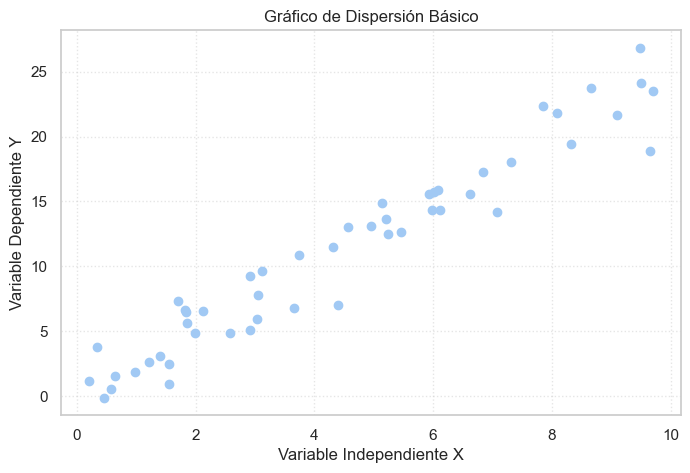

In [6]:
# --- Datos de Ejemplo (Arrays 1D de NumPy) ---
np.random.seed(42) # Para reproducibilidad
coordenadas_x = np.random.rand(50) * 10 # 50 valores aleatorios entre 0 y 10
coordenadas_y = 2.5 * coordenadas_x + np.random.randn(50) * 2 # y = 2.5x + ruido
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.scatter(coordenadas_x, coordenadas_y) # Función básica para dispersión
 
# --- Personalización ---
plt.title("Gráfico de Dispersión Básico")
plt.xlabel("Variable Independiente X")
plt.ylabel("Variable Dependiente Y")
plt.grid(True, linestyle=':', alpha=0.5)
 
# --- Mostrar Gráfico ---
plt.show()

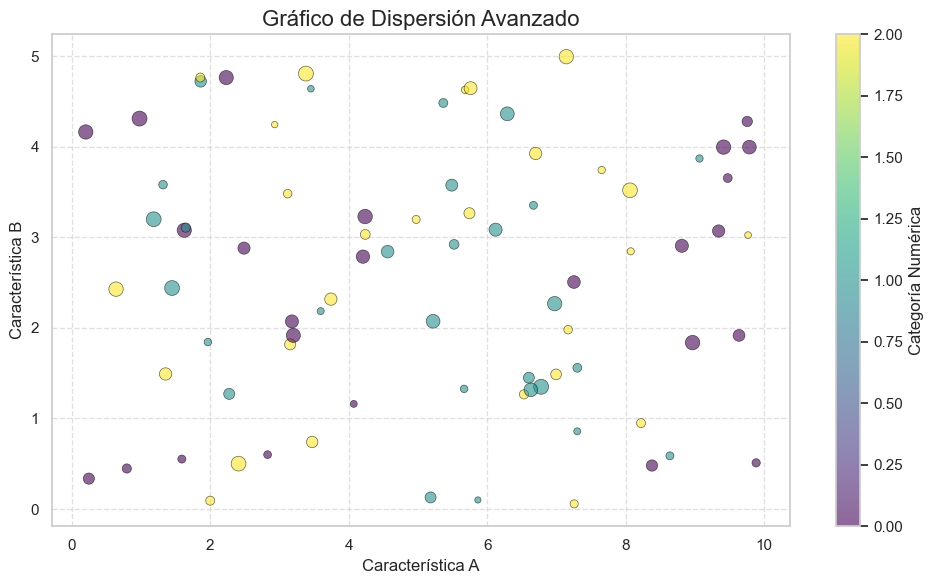

In [7]:
# --- Datos de Ejemplo (Array 2D de NumPy) ---
# Columnas: [Caracteristica_A, Caracteristica_B, Categoria_Numerica, Tamaño_Punto]
np.random.seed(0)
datos_2d_dispersion = np.random.rand(80, 4) # 80 observaciones, 4 características
datos_2d_dispersion[:, 0] *= 10 # Escala Caracteristica_A
datos_2d_dispersion[:, 1] *= 5  # Escala Caracteristica_B
datos_2d_dispersion[:, 2] = np.random.randint(0, 3, 80) # Categoria (0, 1, 2)
datos_2d_dispersion[:, 3] = (datos_2d_dispersion[:, 3] * 100) + 20 # Tamaño de puntos
 
# Extraer columnas para el gráfico
x_avanzado = datos_2d_dispersion[:, 0]
y_avanzado = datos_2d_dispersion[:, 1]
colores_puntos = datos_2d_dispersion[:, 2] # Usar para mapear a colores
tamaños_puntos = datos_2d_dispersion[:, 3] # Usar para el tamaño de los puntos
 
# --- Creación del Gráfico con API Orientada a Objetos ---
fig, ax = plt.subplots(figsize=(10, 6))
 
# --- Graficar ---
# 'c' para el color, 's' para el tamaño, 'cmap' para el mapa de colores si 'c' es numérico
scatter_plot = ax.scatter(x_avanzado, y_avanzado,
                          c=colores_puntos,    # Mapea la tercera columna a colores
                          s=tamaños_puntos,    # Mapea la cuarta columna a tamaños
                          alpha=0.6,           # Transparencia
                          cmap='viridis',      # Mapa de colores para 'c'
                          edgecolors='black',  # Color del borde de los puntos
                          linewidth=0.5)
 
# --- Personalización Avanzada ---
ax.set_title("Gráfico de Dispersión Avanzado", fontsize=16)
ax.set_xlabel("Característica A", fontsize=12)
ax.set_ylabel("Característica B", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
 
# Añadir una barra de color para la variable 'colores_puntos'
barra_color = fig.colorbar(scatter_plot, label='Categoría Numérica')
 
# (Opcional) Añadir leyenda si los colores representan categorías discretas con etiquetas
# Esto requiere graficar cada categoría por separado o usar manejadores de leyenda.
# Por simplicidad, la barra de color es más directa para 'c' numérico.
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

## Seaborn - Gráfico con DataFrame

Primeras filas del DataFrame 'tips':
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


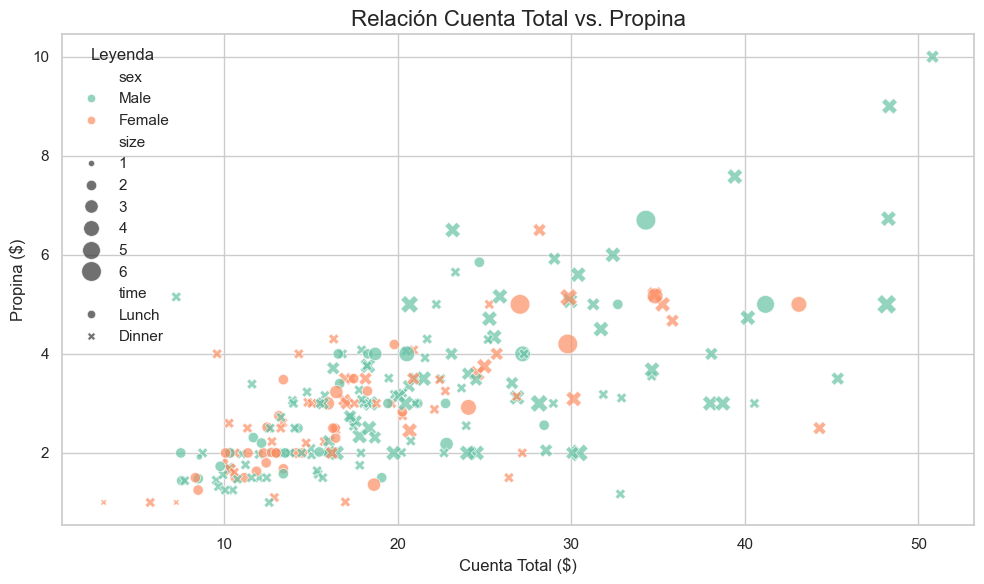

In [8]:
# --- Carga de Datos de Ejemplo (DataFrame de Pandas) ---
df_propinas = sns.load_dataset("tips")
 
# Visualizamos las primeras filas
print("Primeras filas del DataFrame 'tips':")
print(df_propinas.head())
 
# --- Creación del Gráfico de Dispersión con Seaborn ---
plt.figure(figsize=(10, 6))
dispersion_propinas = sns.scatterplot(
    data=df_propinas,
    x="total_bill",      # Columna para el eje X
    y="tip",             # Columna para el eje Y
    hue="sex",           # Diferencia por color según la columna 'sex'
    size="size",         # Diferencia por tamaño del punto según la columna 'size' (nº personas)
    style="time",        # Diferencia por estilo del marcador según la columna 'time'
    palette="Set2",      # Paleta de colores para 'hue'
    sizes=(20, 200),     # Rango de tamaños para 'size'
    alpha=0.7            # Transparencia
)
 
# --- Personalización ---
dispersion_propinas.set_title("Relación Cuenta Total vs. Propina", fontsize=16)
dispersion_propinas.set_xlabel("Cuenta Total ($)", fontsize=12)
dispersion_propinas.set_ylabel("Propina ($)", fontsize=12)
dispersion_propinas.legend(title="Leyenda") # Título para la leyenda combinada
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 

## Gráfico de barras

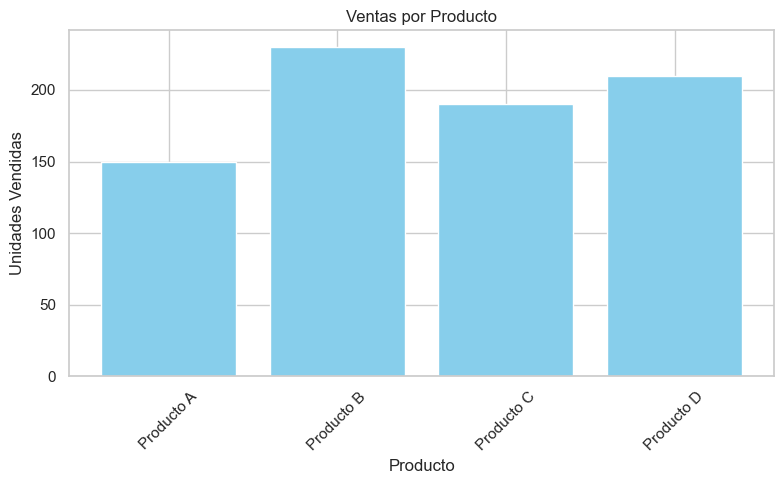

In [9]:
# --- Datos de Ejemplo (Array 1D de NumPy para valores, lista para categorías) ---
categorias = ['Producto A', 'Producto B', 'Producto C', 'Producto D']
ventas = np.array([150, 230, 190, 210]) # Ventas por producto
 
# --- Creación del Gráfico ---
plt.figure(figsize=(8, 5))
plt.bar(categorias, ventas, color='skyblue') # Función básica para barras verticales
 
# --- Personalización ---
plt.title("Ventas por Producto")
plt.xlabel("Producto")
plt.ylabel("Unidades Vendidas")
plt.xticks(rotation=45) # Rota las etiquetas del eje X para mejor lectura si son largas
 
# --- Mostrar Gráfico ---
plt.tight_layout()
plt.show()
 